# Implementation of Linear Regression in Python

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [102]:
df = pd.read_csv('../data/real_estate.csv', index_col=False)
df.shape

(414, 8)

In [103]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


For linear regression, "X1 transaction date" and "Y house price of unit area" columns are used

In [104]:
x_train, x_test, y_train, y_test = train_test_split(df['X1 transaction date'], df['Y house price of unit area'], test_size=0.2, random_state=42)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (331, 1)
x_test shape (83, 1)
y_train shape (331, 1)
y_test shape (83, 1)


## Using Inbuilt function

In [105]:
# Init LinearRegression classifier
cls = linear_model.LinearRegression()
cls.fit(x_train, y_train)

# Make Prediction
pred = cls.predict(x_test)

# Get the parameters used for the classifier
cls.get_params()
print('Co-efficient of linear regression', cls.coef_)
print('Intercept of linear regression model', cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, pred))

Co-efficient of linear regression [[3.64810346]]
Intercept of linear regression model [-7305.84880894]
Mean Square Error 168.99898834093221


Text(0.5, 1.0, 'Linear Regression')

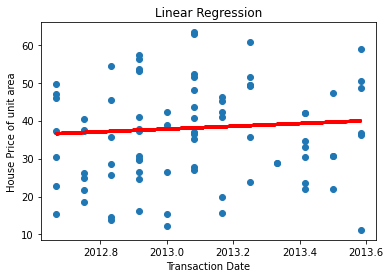

In [106]:
plt.scatter(x_test, y_test)
plt.plot(x_test, pred, color='red', linewidth=3)
plt.xlabel('Transaction Date')
plt.ylabel('House Price of unit area')
plt.title('Linear Regression')

## Linear Regression using Gradient Descent

In [107]:
# Prediction and error function
# Mean Squared Error
def mse(m, b, x, y):
		err = 0
		pred = np.zeros(len(x))
		for i in range(len(x)):
				temp = m*x[i] + b
				pred[i] = temp
				err += (y[i] - temp)**2

		err = err/len(x)
		pred = pred.reshape(-1, 1)
		return err, pred

# Gradient Descent
def gradient_descent(m, b, alpha, iters, x, y):
		for iter in range(iters+1):
				slope_deriv = 0
				intercept_deriv = 0

				for i in range(len(x)):
						intercept_deriv += 2 * ((m*x[i] + b) - y[i])
						slope_deriv += 2 * x[i] * ((m*x[i] + b) - y[i])
				
				m = m - (alpha*slope_deriv)/len(x)
				b = b - (alpha*intercept_deriv)/len(x)

				if iter%5==0:
						print("iter: ", iter, ", m: ", m, ", b: ", b)

		return m, b

In [108]:
alpha = 1e-7
m = 0
b = 0
iters = 10

m, b = gradient_descent(m, b, alpha, iters, x_train, y_train)
err, prediction = mse(m, b, x_test, y_test)

print('m: ', m)
print('b: ', b)
print('Err: ', err)

iter:  0 , m:  [0.01545777] , b:  [7.67830816e-06]
iter:  5 , m:  [0.01906941] , b:  [9.47217389e-06]
iter:  10 , m:  [0.01907029] , b:  [9.47246901e-06]
m:  [0.01907029]
b:  [9.47246901e-06]
Err:  [171.94893456]


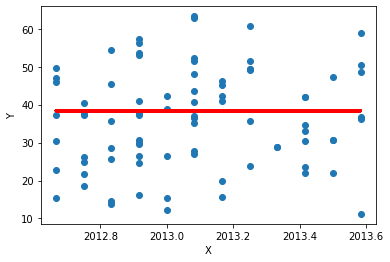

In [109]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth = 3)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()